## 빅콘테스트 KUBIG A 모델 피팅&답안 작성   


In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score

In [ ]:
#드라이브 마운트 및 데이터셋 임포트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 진서님 버전 데이터셋 사용
train_loan6 = pd.read_csv(r'/content/drive/MyDrive/22-2 KUBIG 분류 예측 1팀/김진서/train.csv')
test_loan4 = pd.read_csv(r'/content/drive/MyDrive/22-2 KUBIG 분류 예측 1팀/김진서/test.csv')
test_loan4 = test_loan4.drop('Unnamed: 0', axis=1)
train_loan6 = train_loan6.drop(list(set(set(train_loan6.columns))-set(test_loan4.columns)), axis=1)
test_loan4.drop('is_applied', axis = 1, inplace=True)

In [ ]:
print(test_loan4.shape, train_loan6.shape)
print(list(set(set(train_loan6.columns))-set(test_loan4.columns)))

(3255302, 24) (10263894, 25)
['is_applied']


In [ ]:
train_y = train_loan6['is_applied']
train_loan7 = train_loan6.drop('is_applied',axis=1)
train_loan7 = train_loan7[test_loan4.columns]
train_y.value_counts()

0.0    9709403
1.0     554491
Name: is_applied, dtype: int64

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 모델 평가용(split&smote)한 데이터 불러오는 코드, smote 실행시간이 너무 오래 걸려서 사용... 실제로 필요하지 않음
X_train_smote = pd.read_csv(r'/content/drive/MyDrive/data/Smotetrainx.csv')
y_train_smote = pd.read_csv(r'/content/drive/MyDrive/data/Smotetrainy.csv')
X_train_smote = X_train_smote.drop('Unnamed: 0', axis=1)
y_train_smote = y_train_smote.drop('Unnamed: 0', axis=1)
y_train_smote = y_train_smote['is_applied']

In [ ]:
# 모델 평가용(split&smote)한 데이터에 대응하는 테스트, 실제로 필요하지 않음
X_test = pd.read_csv(r'/content/drive/MyDrive/data/testx.csv')
y_test = pd.read_csv(r'/content/drive/MyDrive/data/testy.csv')
X_test = X_test.drop('Unnamed: 0', axis=1)
y_test = y_test.drop('Unnamed: 0', axis=1)
y_test = y_test['is_applied']

### 모델 평가용 타겟변수 세팅(실행 필요 X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_loan7, train_y, 
                                                    train_size=0.9,
                                                    test_size = 0.1, random_state=100)

In [ ]:
#학습, 테스트 데이터의 크기 재확인
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (9237504, 24)
Shape of X_test:  (1026390, 24)
Shape of y_train:  (9237504,)
Shape of y_test (1026390,)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9237504 entries, 8984537 to 1873416
Data columns (total 24 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   application_id             float64
 1   loanapply_insert_time      float64
 2   bank_id                    float64
 3   product_id                 float64
 4   loan_limit                 float64
 5   loan_rate                  float64
 6   user_id                    float64
 7   insert_time                float64
 8   yearly_income              float64
 9   income_type                float64
 10  employment_type            float64
 11  houseown_type              float64
 12  desired_amount             float64
 13  purpose                    float64
 14  rehabilitation_complete    float64
 15  rehabilitation_incomplete  float64
 16  birth_year                 float64
 17  gender                     float64
 18  credit_score               float64
 19  company_enter_month        float64
 

In [ ]:
# 타겟 변수 불균형 해결 위해 SMOTE 적용(윤기님 코드)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('SMOTE 적용  학습용 피처/레이블 데이터 세트: ', X_train_smote.shape, y_train_smote.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_smote).value_counts())

ValueError: ignored

In [ ]:
X_train_smote.to_csv("Smotetrainx.csv")
y_train_smote.to_csv("Smotetrainy.csv")

In [ ]:
X_test.to_csv("testx.csv")
y_test.to_csv("testy.csv")

### 예측 모델 평가(테스트용, 실행 필요 X)
- 로지스틱 회귀, 랜덤 포레스트, 결정트리, 나이브 베이즈, LightGBM, Soft Voting

In [ ]:
print('SMOTE 적용  학습용 피처/레이블 데이터 세트: ', X_train_smote.shape, y_train_smote.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_smote).value_counts())
print('테스트셋 레이블 값 분포: \n', pd.Series(y_test).value_counts()/len(y_test))

SMOTE 적용  학습용 피처/레이블 데이터 세트:  (17477096, 32) (17477096,)
SMOTE 적용 후 레이블 값 분포: 
 0.0    8738548
1.0    8738548
Name: is_applied, dtype: int64
테스트셋 레이블 값 분포: 
 0.0    0.945893
1.0    0.054107
Name: is_applied, dtype: float64


In [ ]:
# 분석에 앞서 타겟과의 상관관계 체크(트레인)
X_train_smote.corrwith(y_train_smote)

application_id                 0.000847
product_id                     0.079867
loan_limit                    -0.046184
loan_rate                     -0.118771
user_id                       -0.000098
birth_year                     0.031341
gender                        -0.028781
insert_time                    0.011460
credit_score                  -0.396683
yearly_income                 -0.082215
company_enter_month            0.096624
desired_amount                -0.283285
existing_loan_cnt              0.170801
existing_loan_amt             -0.042495
rehabilitation_complete       -0.006640
rehabilitation_incomplete     -0.135087
income_type_EARNEDINCOME      -0.376711
income_type_EARNEDINCOME2     -0.010653
income_type_FREELANCER        -0.038867
income_type_OTHERINCOME       -0.025198
income_type_PRIVATEBUSINESS   -0.064330
employment_type_기타            -0.022608
employment_type_정규직           -0.324353
houseown_type_기타가족소유          -0.130098
houseown_type_자가              -0.254199


In [ ]:
# 분석에 앞서 타겟과의 상관관계 체크(테스트)
X_test.corrwith(y_test)

application_id                 0.002058
product_id                     0.034167
loan_limit                    -0.018768
loan_rate                     -0.051662
user_id                        0.002124
birth_year                     0.013581
gender                        -0.012657
insert_time                    0.008448
credit_score                  -0.168747
yearly_income                 -0.039951
company_enter_month            0.031055
desired_amount                -0.123784
existing_loan_cnt              0.078331
existing_loan_amt             -0.017269
rehabilitation_complete        0.002842
rehabilitation_incomplete      0.003668
income_type_EARNEDINCOME      -0.114275
income_type_EARNEDINCOME2      0.061821
income_type_FREELANCER         0.051190
income_type_OTHERINCOME        0.076792
income_type_PRIVATEBUSINESS    0.038692
employment_type_기타             0.093447
employment_type_정규직           -0.080509
houseown_type_기타가족소유           0.033143
houseown_type_자가              -0.034882


In [ ]:
# 로지스틱 회귀 임포트하여 학습 및 예측
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)
lr_predict = lr.predict(X_test)

In [ ]:
# 오차행렬 및 정확도, F1-Score 출력
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
lr_f1_score = f1_score(y_test, lr_predict)
print(lr_conf_matrix)
print("정확도: ", lr_acc_score*100, "\nF1 score:", lr_f1_score)

[[582725 388130]
 [ 15965  39570]]
정확도:  60.62948781652199 
F1 score: 0.16377125001293366


In [ ]:
# 랜덤 포레스트 임포트하여 학습 및 예측
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train_smote, y_train_smote)
rf_predict=rf.predict(X_test)

In [ ]:
# 오차행렬 및 정확도, F1-Score 출력
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
rf_f1_score = f1_score(y_test, rf_predict)
print(rf_conf_matrix)
print("정확도: ", rf_acc_score*100, "\nF1 score:", rf_f1_score)

[[955609  15246]
 [ 44074  11461]]
정확도:  94.22052046493047 
F1 score: 0.27871403905547043


In [ ]:
# 결정 트리 임포트하여 학습 및 예측
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_smote, y_train_smote)
dt_predict=dt.predict(X_test)

In [ ]:
# 오차행렬 및 정확도 출력
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
dt_f1_score = f1_score(y_test, dt_predict)
print(dt_conf_matrix)
print("정확도: ", dt_acc_score*100, "\nF1 score:", dt_f1_score)

[[756568 214287]
 [ 24635  30900]]
정확도:  76.72210368378491 
F1 score: 0.2055054169631753


In [ ]:
# 나이브 베이즈 임포트하여 학습 및 예측
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train_smote, y_train_smote)
nb_predict=nb.predict(X_test)

In [ ]:
# 오차행렬 및 정확도 출력
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
nb_f1_score = f1_score(y_test, nb_predict)
print(nb_conf_matrix)
print("정확도: ", nb_acc_score*100, "\nF1 score:", nb_f1_score)

[[764137 206718]
 [ 32384  23151]]
정확도:  76.70456649032045 
F1 score: 0.16223318523916977


In [ ]:
# LightGBM 임포트하여 학습 및 예측
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train_smote, y_train_smote)
lgbm_predict = lgbm.predict(X_test)

In [ ]:
# 오차행렬 및 정확도 출력
lgbm_conf_matrix = confusion_matrix(y_test, lgbm_predict)
lgbm_acc_score = accuracy_score(y_test, lgbm_predict)
lgbm_f1_score = f1_score(y_test, lgbm_predict)
print(lgbm_conf_matrix)
print("정확도: ", lgbm_acc_score*100, "\nF1 score:", lgbm_f1_score)

[[952554  18301]
 [ 49129   6406]]
정확도:  93.43037247050341 
F1 score: 0.1596670073029087


In [ ]:
# Soft Voting A 조합, 실행 시간과 메모리 사용량이 무겁지만 성능 우수
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

estimator1 = RandomForestClassifier(n_estimators = 50)
estimator2 = LogisticRegression()
estimator3 = DecisionTreeClassifier(max_depth = 15)

# 각 모델을 불러낼 이름도 같이 지정
sv = VotingClassifier(estimators=[('RF', estimator1), ('LR', estimator2), ('DT', estimator3)], voting='soft')

sv.fit(X_train_smote, y_train_smote)
sv_predict = sv.predict(X_test)

In [ ]:
# 오차행렬 및 정확도 출력
sv_conf_matrix = confusion_matrix(y_test, sv_predict)
sv_acc_score = accuracy_score(y_test, sv_predict)
sv_f1_score = f1_score(y_test, sv_predict)
print(sv_conf_matrix)
print("정확도: ", sv_acc_score*100, "\nF1 score:", sv_f1_score)

[[930529  40326]
 [ 36382  19153]]
정확도:  92.52642757626244 
F1 score: 0.33305510633488095


In [ ]:
# Soft Voting B 조합, 실행 시간과 메모리 사용량이 가볍지만 성능 약간 감소
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

import time
start = time.time()

estimator4 = RandomForestClassifier(n_estimators = 5)
estimator2 = LogisticRegression()
estimator6 = DecisionTreeClassifier(max_depth = 10)
estimator7 = BernoulliNB()

# 각 모델을 불러낼 이름도 같이 지정
sv1 = VotingClassifier(estimators=[('RF', estimator4), ('LR', estimator2), ('DT', estimator6), ('NB', estimator7)], voting='soft')

sv1.fit(X_train_smote, y_train_smote)
sv1_predict = sv1.predict(X_test)

print(time.time() - start)

1685.3914685249329


In [ ]:
# 오차행렬 및 정확도 출력
sv1_conf_matrix = confusion_matrix(y_test, sv1_predict)
sv1_acc_score = accuracy_score(y_test, sv1_predict)
sv1_f1_score = f1_score(y_test, sv1_predict)
print(sv1_conf_matrix)
print("정확도: ", sv1_acc_score*100, "\nF1 score:", sv1_f1_score)

[[905556  65299]
 [ 34663  20872]]
정확도:  90.26081703835774 
F1 score: 0.29458173965816553


In [ ]:
models1 = [('Logistic Regression', 0.16377125001293366),
          ('Naive Bayes', 0.16223318523916977),
          ('Random Forest', 0.27871403905547043),
          ('Decision Tree', 0.2055054169631753),
          ('Lgbm', 0.1596670073029087),
          ('Soft Voting(A)', 0.33305510633488095),
          ('Soft Voting(B)', 0.29458173965816553),
         ]
predict1 = pd.DataFrame(data = models1, columns=['Model', 'F1'])
predict1

,Model,F1
0,Logistic Regression,0.163771
1,Naive Bayes,0.162233
2,Random Forest,0.278714
3,Decision Tree,0.205505
4,Lgbm,0.159667
5,Soft Voting(A),0.333055
6,Soft Voting(B),0.294582


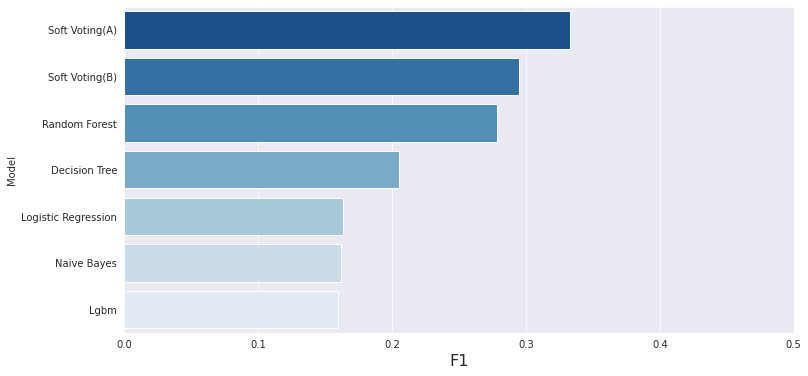

In [ ]:
# 학습 데이터셋의 결정계수 내림차순 정렬하고 그래프 출력
# 낮은 f1 스코어는 데이터 태생적인 타겟변수 불균형 때문으로 보임
f, axe = plt.subplots(1,1, figsize=(12,6))

predict1.sort_values(by=['F1'], ascending=False, inplace=True)

sns.barplot(x='F1', y='Model', data = predict1, palette='Blues_r', ax = axe)
axe.set_xlabel('F1', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,0.5)
plt.show()

### 전체 학습용 타겟변수 세팅

In [ ]:
# 타겟 변수 불균형 해결 위해 SMOTE 적용(윤기님 코드)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(train_loan7, train_y)

print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_smote.shape, y_train_smote.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_smote).value_counts()) 

SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (19418806, 24) (19418806,)
SMOTE 적용 후 레이블 값 분포: 
 1.0    9709403
0.0    9709403
Name: is_applied, dtype: int64


In [ ]:
# 메모리 부족을 대비해 smote 결과 저장
X_train_smote.to_csv("Smotex.csv")
y_train_smote.to_csv("Smotey.csv")

### K-fold 적용

In [ ]:
# 메모리 절약 위해 런타임 재시작하고 smote 결과 불러옴
X_train_smote = pd.read_csv(r'Smotex.csv')
X_train_smote = X_train_smote.drop('Unnamed: 0', axis=1)
y_train_smote = pd.read_csv(r'Smotey.csv')['is_applied']
test_loan4 = pd.read_csv(r'/content/drive/MyDrive/22-2 KUBIG 분류 예측 1팀/김진서/test.csv')
test_loan4 = test_loan4.drop(['Unnamed: 0','is_applied'], axis=1)
predict = test_loan4[['application_id','product_id']]

In [ ]:
print(X_train_smote.shape, y_train_smote.shape, test_loan4.shape, )

(19418806, 24) (19418806,) (3255302, 24)


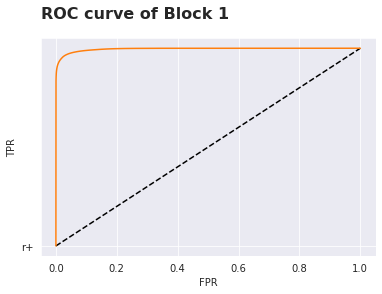

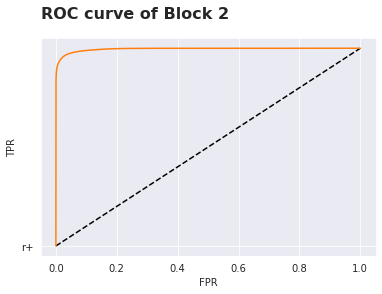

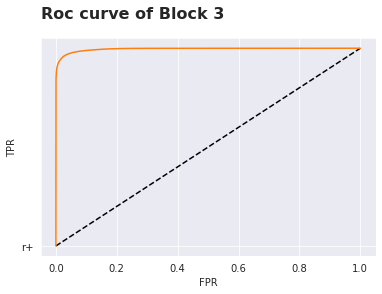

각 분할의 정확도 기록 : [0.9669394228523193, 0.9668028490939582, 0.9667972874746927]
각 분할의 f1 점수 기록 : [0.9668355221732692, 0.9667065527586398, 0.966692955570719]
평균 정확도 : 0.9668465198069901 평균 f1 : 0.9667450101675427
(3255302, 1) (19418806, 1)


In [ ]:
# K-Fold 스태킹 적용(3분할)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve

accuracy_history = []
f1_history = []
title = ['ROC curve of Block 1', 'ROC curve of Block 2', 'Roc curve of Block 3']

kf = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 50)

train_fold_predict = np.zeros((X_train_smote.shape[0], 1))
test_predict = np.zeros((test_loan4.shape[0], 3))

# K-fold 검증 과정으로 앙상블한 모델 최종 stacking 및 검증
for cnt, (train_index, valid_index) in enumerate(kf.split(X_train_smote, y_train_smote)):
    
    X_train_ = X_train_smote.loc[train_index]
    y_train_ = y_train_smote.loc[train_index]
    X_validation = X_train_smote.loc[valid_index]
    y_validation = y_train_smote.loc[valid_index]


    estimator1 = RandomForestClassifier(n_estimators = 15)
    estimator2 = LogisticRegression()
    estimator3 = DecisionTreeClassifier(max_depth = 10)

    sv = VotingClassifier(estimators=[('RF', estimator1), ('LR', estimator2), ('DT', estimator3)], voting='soft')

    sv.fit(X_train_smote, y_train_smote)

    y_pred = sv.predict(X_validation)

    train_fold_predict[valid_index, 0] = sv.predict_proba(X_validation)[:,1]
    test_predict[:, cnt] = sv.predict_proba(test_loan4)[:,1]

    accuracy_history.append(accuracy_score(y_pred, y_validation)) #정확도 측정 및 기록
    f1_history.append(f1_score(y_pred, y_validation)) #f1 측정 및 기록

    fpr, tpr, thresholds = roc_curve(y_validation, sv.predict_proba(X_validation)[:,1])
    plt.plot([0,1], [0,1], "k--", "r+")
    plt.plot(fpr, tpr, label='Soft Voting')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    title_font = { 'fontsize': 16, 'fontweight': 'bold'}
    plt.title(title[cnt], fontdict=title_font, loc='left', pad=20)
    plt.show()

test_predict_mean = np.mean(test_predict, axis=1).reshape(-1,1)

print("각 분할의 정확도 기록 :", accuracy_history)
print("각 분할의 f1 점수 기록 :", f1_history)
print("평균 정확도 :", np.mean(accuracy_history), "평균 f1 :", np.mean(f1_history))
print(test_predict_mean.shape, train_fold_predict.shape)

In [ ]:
# 로지스틱 회귀 임포트해 예측 확률 다시 보정
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(train_fold_predict, y_train_smote)
predict['is_applied'] = lr1.predict(test_predict_mean) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# evaluate.csv = 데이터분석분야_퓨처스부문_평가데이터.csv
# 평가데이터 파일을 불러오고 예측 결과와 매칭
# 결측치는 loan_limit 관련 결측치로, 채점에서 제외됨. 혹시 몰라 0으로 처리
predict[['application_id','product_id']].drop_duplicates(inplace=True)
eval = pd.read_csv('/content/drive/MyDrive/22-2 KUBIG 분류 예측 1팀/A팀/데이터분석분야_퓨처스부문_평가데이터.csv')
eval.drop('is_applied', axis = 1, inplace=True)
eval = eval.merge(predict, on=['application_id', 'product_id'], how='left')
eval['is_applied'].fillna(0, inplace=True)
eval.to_csv('Answer.csv')

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


###예측 모델 시각화

In [ ]:
# 로지스틱 회귀에서 계수 체크, 그중 key 변수는 제외
Coef = pd.DataFrame(sv.estimators_[1].coef_, columns = X_train_smote.columns)
Coef.loc[1] = X_train_smote.columns
Coef.drop(columns=['application_id','bank_id', 'product_id','user_id'], inplace=True)
Coef.reset_index(inplace=True)
Coefn = Coef.T.sort_values(by = 0, ascending = True).head(5)
Coefp = Coef.T.sort_values(by = 0, ascending = False).head(5)

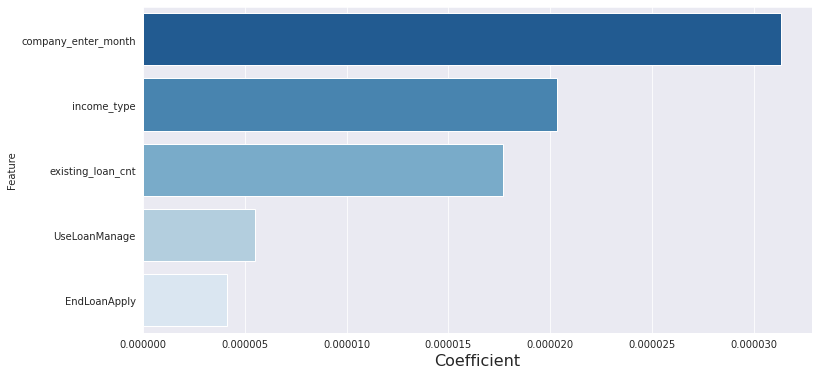

In [ ]:
# 양의 계수 중 가장 큰 5가지 시각화
f, axe = plt.subplots(1,1, figsize=(12,6))

sns.barplot(x=0, y=1, data = Coefp, palette='Blues_r', ax = axe)
axe.set_xlabel('Coefficient', size=16)
axe.set_ylabel('Feature')
axe.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()

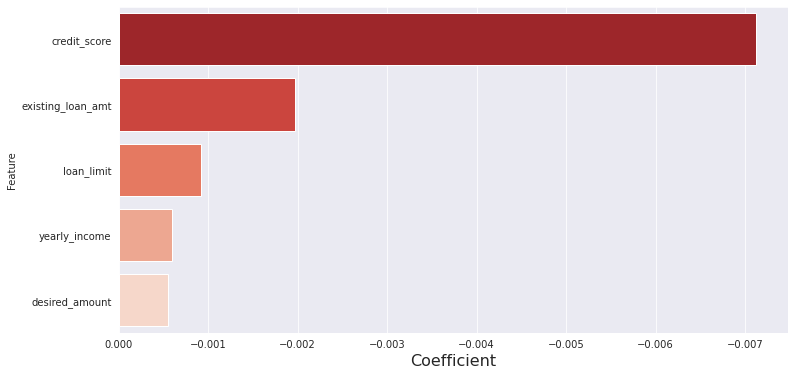

In [ ]:
# 음의 계수 중 절댓값이 가장 큰 5가지 시각화
f, axe = plt.subplots(1,1, figsize=(12,6))

sns.barplot(x=0, y=1, data = Coefn, palette='Reds_r', ax = axe)
axe.set_xlabel('Coefficient', size=16)
axe.set_ylabel('Feature')
axe.get_xaxis().get_major_formatter().set_scientific(False)
plt.gca().invert_xaxis()
plt.show()

In [ ]:
# 결정 트리 시각화
from sklearn.tree import export_graphviz
import pydotplus

tree = export_graphviz(sv.estimators_[2], out_file=None,
                       feature_names = X_train_smote.columns, rounded=True, filled=True, max_depth = 3)

pydot_graph = pydotplus.graph_from_dot_data(tree)
pydot_graph.write_png('tree.png')

True

(-0.5, 2196.5, 612.5, -0.5)

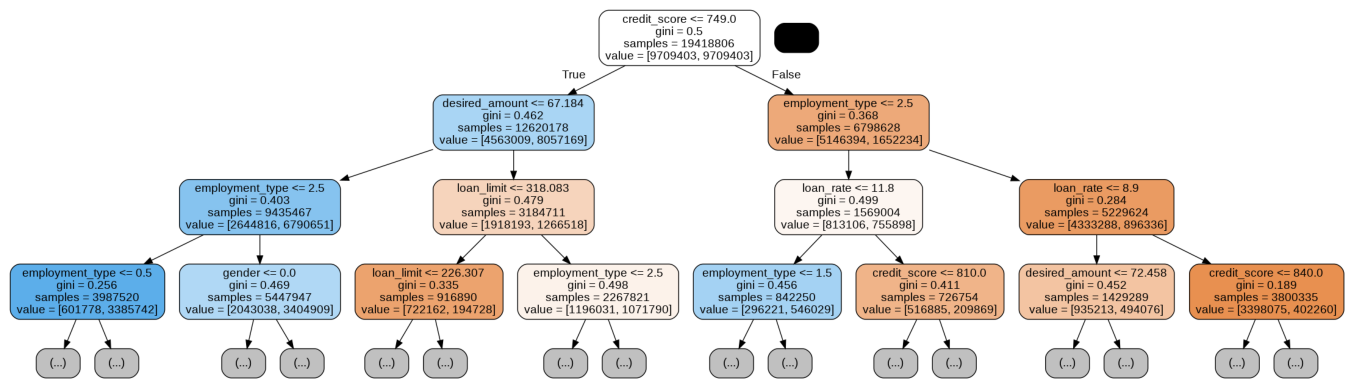

In [ ]:
# 결정 트리 일부만 이미지화(tree.png)
import matplotlib.image as mpimg
reduced = mpimg.imread('tree.png')
plt.figure(figsize=(24, 16))
plt.imshow(reduced)
plt.axis('off')

In [ ]:
# 랜덤 포레스트 시각화(랜덤 포레스트 중 첫번째, 두번째 estimator만 체크)
from sklearn.tree import export_graphviz
import pydotplus

forest1 = export_graphviz(sv.estimators_[0].estimators_[0], out_file=None,
                       feature_names = X_train_smote.columns, rounded=True, filled=True, max_depth = 2)

pydot_graph = pydotplus.graph_from_dot_data(forest1)
pydot_graph.write_png('forest1.png')

forest2 = export_graphviz(sv.estimators_[0].estimators_[1], out_file=None,
                       feature_names = X_train_smote.columns, rounded=True, filled=True, max_depth = 2)

pydot_graph = pydotplus.graph_from_dot_data(forest2)
pydot_graph.write_png('forest2.png')

True

(-0.5, 1098.5, 474.5, -0.5)

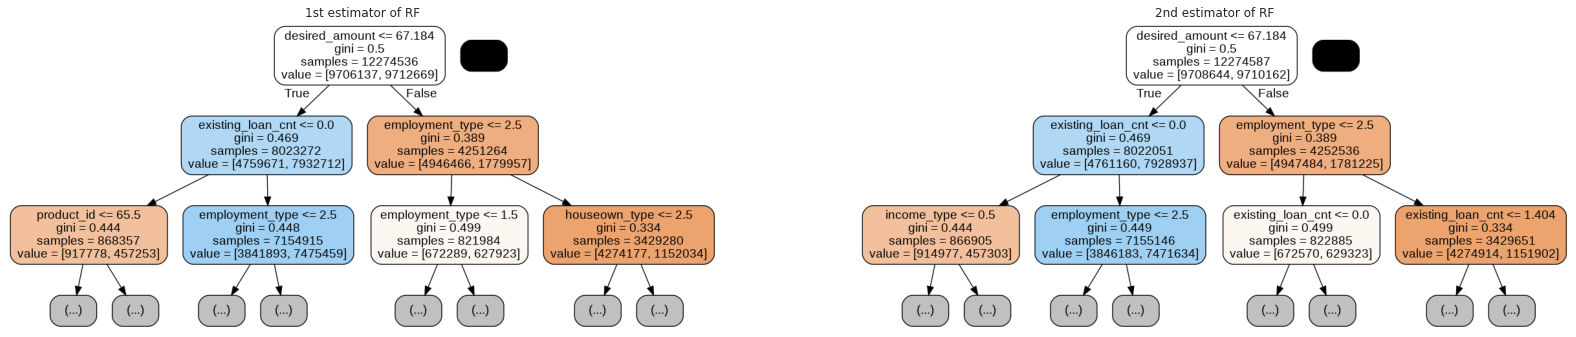

In [ ]:
# 랜덤 포레스트 일부만 이미지화(forest.png)
import matplotlib.image as mpimg
reduced1 = mpimg.imread('forest1.png')
reduced2 = mpimg.imread('forest2.png')
plt.figure(figsize=(28, 24))
plt.subplot(1,2,1)
plt.imshow(reduced1)
plt.axis('off')
plt.title('1st estimator of RF')
plt.subplot(1,2,2)
plt.imshow(reduced2)
plt.title('2nd estimator of RF')
plt.axis('off')

###예측 결과 살짝 확인

In [ ]:
predict['is_applied'].value_counts()

0.0    2136064
1.0    1119238
Name: is_applied, dtype: int64

In [ ]:
result = pd.DataFrame(pd.DataFrame(pd.DataFrame(np.floor(test_predict_mean*10)/10).value_counts()/len(test_predict_mean), columns = ['Num']))
result.reset_index(inplace=True)
result.columns = ['Probability', 'Ratio']
result.sort_values('Probability' ,ascending = True, inplace=True)

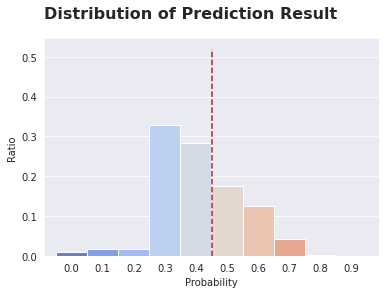

In [ ]:
# 예측 결과 분포 그래프
width = 1
ax = sns.barplot(x=result['Probability'], y=result['Ratio'], palette = 'coolwarm')
for bar in ax.patches:
    x = bar.get_x() 
    old_width = bar.get_width() 
    bar.set_width(width)
    bar.set_x(x+(old_width-width)/2)

plt.plot([4.51, 4.51], [0,0.52],"--", color='brown')
title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title('Distribution of Prediction Result', fontdict=title_font, loc='left', pad=20)
plt.show()

In [ ]:
# 모델이 트레인 셋에는 어떻게 확률 부여했는지 확인
train_ny = pd.DataFrame(y_train_smote, columns = ['is_applied'])
train_ny['prob'] = train_fold_predict
train_n = train_ny.loc[train_ny['is_applied'] == 0]
train_y = train_ny.loc[train_ny['is_applied'] == 1]

In [ ]:
resultn = pd.DataFrame(pd.DataFrame(pd.DataFrame(np.floor(train_n['prob']*10)/10).value_counts()/len(train_n['prob']), columns = ['Num']))
resultn.reset_index(inplace=True)
resultn.columns = ['Probability', 'Ratio']
resultn.sort_values('Probability' ,ascending = True, inplace=True)

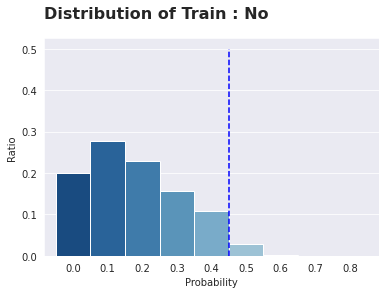

In [ ]:
# 타겟이 0인 트레인 셋 데이터에 모델이 부여한 확률
width = 1
ax = sns.barplot(x=resultn['Probability'], y=resultn['Ratio'], palette = 'Blues_r')
for bar in ax.patches:
    x = bar.get_x() 
    old_width = bar.get_width() 
    bar.set_width(width)
    bar.set_x(x+(old_width-width)/2)

plt.plot([4.51, 4.51], [0,0.5],"--", color='blue')
title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title('Distribution of Train : No', fontdict=title_font, loc='left', pad=20)
plt.show()

In [ ]:
resulty = pd.DataFrame(pd.DataFrame(pd.DataFrame(np.floor(train_y['prob']*10)/10).value_counts()/len(train_y['prob']), columns = ['Num']))
resulty.reset_index(inplace=True)
resulty.columns = ['Probability', 'Ratio']
resulty.sort_values('Probability' ,ascending = True, inplace=True)

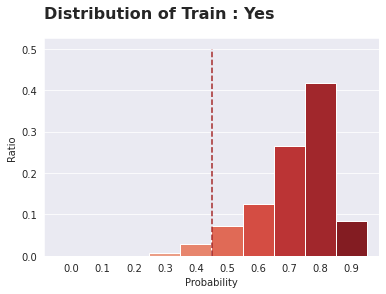

In [ ]:
# 타겟이 1인 트레인 셋 데이터에 모델이 부여한 확률
width = 1
ax = sns.barplot(x=resulty['Probability'], y=resulty['Ratio'], palette = 'Reds')
for bar in ax.patches:
    x = bar.get_x() 
    old_width = bar.get_width() 
    bar.set_width(width)
    bar.set_x(x+(old_width-width)/2)

plt.plot([4.51, 4.51], [0,0.5],"--", color='brown')
title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title('Distribution of Train : Yes', fontdict=title_font, loc='left', pad=20)
plt.show()

# HTML 파일로 변환(추가제출파일)